<a href="https://colab.research.google.com/github/kevinawongw/CSCI_4802_Wine/blob/main/CSCI_4802_WineProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCI 4022 - Final Project 
<b>Kevina Wong</b> - kevina.wong@colorado.edu

<b>Vienna Wong</b> - vienna.wong@colraodo.edu

<b>Yubin (Sally) Go </b> - yubin.go@colorado.edu

## Question of Interest:

Can we use algorithms to classify wine type based on flavor profile and descriptions?


## Data

The link to the dataset can be found [here](https://docs.google.com/spreadsheets/d/1DuHnmSNEWDIcu_QoBHBpybO-qS1FfiDxftMsY33kfUw/edit?usp=sharing
).


This dataset consists of roughly 151,000 entries of wines. The columns included are: country, description, designation, points, price, province	region_1, region_2, variety, winery.


## Organization of Data  

<ol>
<li> <b>Data Wrangline and Organization</b> </li>

We only intend on using the columns 'description' and 'variety'.

Descriptions include a description of the flavor profile for each wine. Viariety tells us what type of wine it is (Merlot, Pinot Noir, etc.). These two will be our only relevant columns since we are trying to classify wine variety using its written description.

All cells are converted to lowercase without punctuation. Lastly, we also created subsets of the dataframe grouped by wine variety. We have also eliminated common articles, prepositions, and conjunctions so our frequent items aren't skewed.

<li><b>Creating Item Baskets </b>

We created dictionaries to hold our items acting as an item basket.
The structure of the dictionary will look like like:

variety -> {[array of words in description]}

</ol>


In [35]:
# Imports & Packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import itertools
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import string
import collections
import seaborn

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
# Read DataFrame

df = pd.read_csv('wine.csv', on_bad_lines='skip')
df = df[["description", "variety"]]
df.tail()

,description,variety
150925,Many people feel Fiano represents southern Ita...,White Blend
150926,"Offers an intriguing nose with ginger, lime an...",Champagne Blend
150927,This classic example comes from a cru vineyard...,White Blend
150928,"A perfect salmon shade, with scents of peaches...",Champagne Blend
150929,More Pinot Grigios should taste like this. A r...,Pinot Grigio


In [37]:
# Clean Dataframe
df['variety'] = df['variety'].astype('str') 
df['description'] = df['description'].astype('str')
clean_df = df.dropna()
clean_df = clean_df.drop_duplicates().reset_index(drop=True)

clean_df.tail()

,description,variety
97825,A Syrah-Grenache blend that's dry and rustical...,Syrah-Grenache
97826,Oreo eaters will enjoy the aromas of this wine...,Port
97827,"Outside of the vineyard, wines like this are w...",Merlot
97828,"Heavy and basic, with melon and pineapple arom...",Sauvignon Blanc
97829,"Smooth in the mouth, this Chard starts off wit...",Chardonnay


In [38]:
unique_varieties = np.unique(df['variety'])

print("+=== Wine Varieties ===+")
topCounts = (clean_df['variety'].value_counts()[:15])
print(topCounts)

+=== Wine Varieties ===+
Pinot Noir                  9283
Chardonnay                  9159
Cabernet Sauvignon          8270
Red Blend                   6485
Bordeaux-style Red Blend    5170
Sauvignon Blanc             4034
Syrah                       3662
Riesling                    3583
Merlot                      3178
Zinfandel                   2408
Sangiovese                  2152
Malbec                      1968
Rosé                        1910
White Blend                 1858
Tempranillo                 1622
Name: variety, dtype: int64


In [39]:
# Remove Unwanted / Weird Genres
keep = ['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend', 'Bordeaux-style Red Blend', 'Sauvignon Blanc', 'Syrah', 'Riesling', 'Merlot', 'Zinfandel', 'Sangiovese', 'Malbec', 'Rosé', 'White Blend', 'Tempranillo'] 
clean_df = clean_df.loc[clean_df['variety'].isin(keep)].copy()

clean_df.tail()


,description,variety
97820,Tastes kind of soft and thick in jammy cherry ...,Merlot
97822,Nut and white stone fruit aromas start things ...,Chardonnay
97827,"Outside of the vineyard, wines like this are w...",Merlot
97828,"Heavy and basic, with melon and pineapple arom...",Sauvignon Blanc
97829,"Smooth in the mouth, this Chard starts off wit...",Chardonnay


In [40]:
unique_varieties = np.unique(df['variety'])

print("+=== Wine Varieties ===+")
topCounts = (clean_df['variety'].value_counts()[:15])
print(topCounts)

+=== Wine Varieties ===+
Pinot Noir                  9283
Chardonnay                  9159
Cabernet Sauvignon          8270
Red Blend                   6485
Bordeaux-style Red Blend    5170
Sauvignon Blanc             4034
Syrah                       3662
Riesling                    3583
Merlot                      3178
Zinfandel                   2408
Sangiovese                  2152
Malbec                      1968
Rosé                        1910
White Blend                 1858
Tempranillo                 1622
Name: variety, dtype: int64


In [41]:
# Put wine varieties into their own dataframe

pinotNoir = clean_df.loc[(clean_df['variety'] == 'Pinot Noir')].copy().drop_duplicates().reset_index(drop=True)
chardonnay = clean_df.loc[(clean_df['variety'] == 'Chardonnay')].copy().drop_duplicates().reset_index(drop=True)
cabernetSauvignon = clean_df.loc[(clean_df['variety'] == 'Cabernet Sauvignon')].copy().drop_duplicates().reset_index(drop=True)
redBlend = clean_df.loc[(clean_df['variety'] == 'Red Blend')].copy().drop_duplicates().reset_index(drop=True)
bordeauxStyleRedBlend = clean_df.loc[(clean_df['variety'] == 'Bordeaux-style Red Blend')].copy().drop_duplicates().reset_index(drop=True)
sauvignonBlanc= clean_df.loc[(clean_df['variety'] == 'Sauvignon Blanc')].copy().drop_duplicates().reset_index(drop=True)
syrah= clean_df.loc[(clean_df['variety'] == 'Syrah')].copy().drop_duplicates().reset_index(drop=True)
riesling= clean_df.loc[(clean_df['variety'] == 'Riesling')].copy().drop_duplicates().reset_index(drop=True)
merlot= clean_df.loc[(clean_df['variety'] == 'Merlot')].copy().drop_duplicates().reset_index(drop=True)
zinfandel= clean_df.loc[(clean_df['variety'] == 'Zinfandel')].copy().drop_duplicates().reset_index(drop=True)
sangiovese = clean_df.loc[(clean_df['variety'] == "Sangiovese")].copy().drop_duplicates().reset_index(drop=True)
malbec= clean_df.loc[(clean_df['variety'] == 'Malbec')].copy().drop_duplicates().reset_index(drop=True)
rose = clean_df.loc[(clean_df['variety'] == 'Rosé')].copy().drop_duplicates().reset_index(drop=True)
whiteBlend= clean_df.loc[(clean_df['variety'] == 'White Blend')].copy().drop_duplicates().reset_index(drop=True)
tempranillo = clean_df.loc[(clean_df['variety'] == 'Tempranillo')].copy().drop_duplicates().reset_index(drop=True)

myDfs = [pinotNoir,chardonnay,cabernetSauvignon,redBlend,bordeauxStyleRedBlend,sauvignonBlanc,syrah,riesling,merlot,zinfandel,sangiovese,malbec,rose,whiteBlend,tempranillo]

myNames = ["Pinot Noir" , "Chardonnay","Cabernet Sauvignon" , "Red Blend", "Bordeaux-style Red Blend", "Sauvignon Blanc" , "Syrah" ,"Riesling", "Merlot" , "Zinfandel" , "Sangiovese" ,"Malbec","Rosé","White Blend","Tempranillo"]

In [42]:
temp = []
for i in range(len(topCounts)):
  temp.append(topCounts[i])

wineCount = dict(zip(myNames,temp))
print(wineCount)

{'Pinot Noir': 9283, 'Chardonnay': 9159, 'Cabernet Sauvignon': 8270, 'Red Blend': 6485, 'Bordeaux-style Red Blend': 5170, 'Sauvignon Blanc': 4034, 'Syrah': 3662, 'Riesling': 3583, 'Merlot': 3178, 'Zinfandel': 2408, 'Sangiovese': 2152, 'Malbec': 1968, 'Rosé': 1910, 'White Blend': 1858, 'Tempranillo': 1622}


In [43]:
for i in myDfs:
  print(np.unique(i['variety']))

['Pinot Noir']
['Chardonnay']
['Cabernet Sauvignon']
['Red Blend']
['Bordeaux-style Red Blend']
['Sauvignon Blanc']
['Syrah']
['Riesling']
['Merlot']
['Zinfandel']
['Sangiovese']
['Malbec']
['Rosé']
['White Blend']
['Tempranillo']


In [44]:
removedWords = ["include", "remain", "remains", "scented", "scent", "through", "developing", 
                "both", "finishes", "drink", "ready", "glass", "suggestion", "suggestions", "stays", "offer",
                "together",  "start", "give", "topped", "delivers", "brings", "structure","100%", "accented", "offers",
                "blend", "paired", "carry", "carries", "taste", "tastes", "slightly", "good", "wines",
                "along", "note", "notes", "develop","wine", "hint", "flavors", "flavor", "accent", "accents", "but", "vineyard", "local",
                "create", "a", "an", "the", "my", "your", "his", "her", "its", "our", "their", "whose", "that", "this", "these", "those", "one", "first",
                "many", "few", "any", "is", "to", "by", "of", "on", "are", "in","for", "and", "as", "be","he","she","from","him","with","after","up","over",
                "now","when","at","who","if","they","them","but","yet","so","only","out", "have", "it", "not", "theyre", "into", "which", "of", "will","where", 
                "best", 'better', 'because', 'than', 'most', 'then', 'get', 'here', 'also', 'goes', 'very', 'things', "'s",  'like', 'while', "has", "since", "don't", 
                "to", "over", "into", "n't", "from", "are", "or", "was", "made", "makes", "shows", "all", "next", "already", "though", "find", "'ll", "you",
                "finish", "there", "feel", "feels", "more", "pinot", "noir",
                "chardonnay","cabernet","sauvignon" , "red","blend", "bordeaux-style",
                "sauvignon", "blanc" , "syrah" ,"riesling", "merlot" , "zinfandel" , "sangiovese" ,"malbec",
                "rosé","white","tempranillo", "palate", "aroma", 'aromas']

In [45]:
myPunc = []
for punc in string.punctuation:
  myPunc.append(punc)

In [46]:
# Helper to Clean Description

def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)

def cleanDesc(desc, removedWords, punc):

    desc = desc.lower()
    keepWords = []
    token = word_tokenize(desc)
    for t in token:
        t.replace("'","")
        for punc in myPunc:
          t.replace(punc,"")
        if (t not in removedWords) and (t not in myPunc) and (not has_numbers(t)):
          keepWords.append(t)

    return set(keepWords)      

## Part 1: Item Baskets & Apriori Algorithm



In [47]:
# Initialize Basket Dictionaries 

pinotNoirBasket = {"Pinot Noir": []}
chardonnayBasket = {"Chardonnay": []}
cabernetSauvignonBasket = {"Cabernet Sauvignon": []}
redBlendBasket = {"Red Blend": []}
bordeauxStyleRedBlendBasket = {"Bordeaux-style Red Blend": []}
sauvignonBlancBasket = {"Sauvignon Blanc": []}
syrahBasket = {"Syrah": []}
rieslingBasket = {"Riesling": []}
merlotBasket= {"Merlot": []}
zinfandelBasket = {"Zinfandel": []}
sangioveseBasket = {"Sangiovese": []}
malbecBasket = {"Malbec": []}
roseBasket = {"Rosé": []}
whiteBlendBasket= {"White Blend": []}
tempranilloBasket= {"Tempranillo": []}
 
myBaskets = [pinotNoirBasket,chardonnayBasket,cabernetSauvignonBasket,redBlendBasket,bordeauxStyleRedBlendBasket,sauvignonBlancBasket,syrahBasket,rieslingBasket,merlotBasket,zinfandelBasket,sangioveseBasket,malbecBasket,roseBasket,whiteBlendBasket,tempranilloBasket]


In [48]:
# Clean descriptions in the dataframe
for df, basket in zip(myDfs,myBaskets):
  setItems = []
  for index,row in df.iterrows():
    temp = list(cleanDesc(row['description'], removedWords, myPunc))
    setItems.append(temp)
  df['setDesc'] = (setItems)
  basket[row['variety']] = (setItems)
  basket[row['variety']] = set(list(np.concatenate(basket[row['variety']]).flat))
  basket[row['variety']] = list(basket[row['variety']])
  print(len(basket[row['variety']]))


  print("=== Working ===" + df["variety"])
  print((basket[row['variety']]))


11628
0       === Working ===Pinot Noir
1       === Working ===Pinot Noir
2       === Working ===Pinot Noir
3       === Working ===Pinot Noir
4       === Working ===Pinot Noir
                  ...            
9278    === Working ===Pinot Noir
9279    === Working ===Pinot Noir
9280    === Working ===Pinot Noir
9281    === Working ===Pinot Noir
9282    === Working ===Pinot Noir
Name: variety, Length: 9283, dtype: object
['quietly', 'beetroot', 'cinderella', 'initials', 'streaks', 'warm-hearted', 'orchestrated', 'always-excellent', 'rognets', 'challenged', 'most-admired', 'plushness', 'meshed', 'firmly', 'venison—many', 'jelly', 'testimony', 'feral', 'alive', 'barbara', 'cafe', 'climes', 'bella', 'thicket', 'thinner', 'tastings', 'amid', 'and/or', 'tannicly', 'comprised', 'stainless-steel-fermented', 'embraced—the', 'long-lasting', 'flecked', 'incisa', 'rewarded', 'impatient', 'afforable', 'supple-textured', 'tutti-fruity', 'contemplation', 'vigneron', 'mint-inflected', 'pommard', 'gravy

In [49]:
for i in myBaskets:
  for key, value in i.items():
    print("===" + key + " Sample Words ===")
    print(len(value))
    print((value[0:50]))

    print("\n")

===Pinot Noir Sample Words ===
11628
['quietly', 'beetroot', 'cinderella', 'initials', 'streaks', 'warm-hearted', 'orchestrated', 'always-excellent', 'rognets', 'challenged', 'most-admired', 'plushness', 'meshed', 'firmly', 'venison—many', 'jelly', 'testimony', 'feral', 'alive', 'barbara', 'cafe', 'climes', 'bella', 'thicket', 'thinner', 'tastings', 'amid', 'and/or', 'tannicly', 'comprised', 'stainless-steel-fermented', 'embraced—the', 'long-lasting', 'flecked', 'incisa', 'rewarded', 'impatient', 'afforable', 'supple-textured', 'tutti-fruity', 'contemplation', 'vigneron', 'mint-inflected', 'pommard', 'gravy', 'uplifting', 'worthy', 'fatter', 'value', 'longer']


===Chardonnay Sample Words ===
11057
['acid-minded', 'timid', 'highways', 'streaks', 'fairness', 'challenged', 'yellow-fruit', 'similar—an', 'patina', 'detriment', 'lowe', 'meshed', 'firmly', 'jelly', 'prepare', 'wheaty', 'testimony', 'feral', 'over-toasty', 'more-than-generous', 'alive', 'barbara', 'carbonization', 'low-end', 

In [50]:
def getPercentage(myDict):
    myDict = {k: round(v/len(myDict),5) for k,v in zip(myDict.keys(),myDict.values())}
    return myDict

def getWordCounts(listA, listSets):
    x = collections.Counter(item for item in listA for myset in listSets if item in myset)
    freq = getPercentage(dict(x))
    return freq


In [51]:
# Initialize Word Count Dictionaries
%%capture

pinotNoirWC = getWordCounts(list(pinotNoirBasket.values())[0],pinotNoir['setDesc'])
print("=== Done Pinot Noir ===")
chardonnayWC = getWordCounts(list(chardonnayBasket.values())[0],chardonnay['setDesc'])
print("=== Done Chardonnay ===")
cabernetSauvignonWC = getWordCounts(list(cabernetSauvignonBasket.values())[0],cabernetSauvignon['setDesc'])
print("=== Done Cabernet Sauvignon ===")
redBlendWC = getWordCounts(list(redBlendBasket.values())[0],redBlend['setDesc'])
print("=== Done Red Blend ===")
bordeauxStyleRedBlendWC = getWordCounts(list(bordeauxStyleRedBlendBasket.values())[0],bordeauxStyleRedBlend['setDesc'])
print("=== Done Bordeaux Style Red Blend ===")
sauvignonBlancWC = getWordCounts(list(sauvignonBlancBasket.values())[0],sauvignonBlanc['setDesc'])
print("=== Done Sauvignon Blanc ===")
syrahWC = getWordCounts(list(syrahBasket.values())[0],syrah['setDesc'])
print("=== Done Syrah ===")
rieslingWC = getWordCounts(list(rieslingBasket.values())[0],riesling['setDesc'])
print("=== Done Riesling ===")
merlotWC= getWordCounts(list(merlotBasket.values())[0],merlot['setDesc'])
print("=== Done Merlot ===")
zinfandelWC = getWordCounts(list(zinfandelBasket.values())[0],zinfandel['setDesc'])
print("=== Done Zindanfel ===")
sangioveseWC = getWordCounts(list(sangioveseBasket.values())[0],sangiovese['setDesc'])
print("=== Done Sangiovese ===")
malbecWC = getWordCounts(list(malbecBasket.values())[0],malbec['setDesc'])
print("=== Done Malbec ===")
roseWC = getWordCounts(list(roseBasket.values())[0],rose['setDesc'])
print("=== Done Rose ===")
whiteBlendWC = getWordCounts(list(whiteBlendBasket.values())[0],whiteBlend['setDesc'])
print("=== Done White Blend ===")
tempranilloWC = getWordCounts(list(tempranilloBasket.values())[0],tempranillo['setDesc'])
print("=== Done Temperanillo ===")


myWCDict = [pinotNoirWC,chardonnayWC,cabernetSauvignonWC,redBlendWC,bordeauxStyleRedBlendWC,sauvignonBlancWC,syrahWC,rieslingWC,merlotWC,zinfandelWC,sangioveseWC,malbecWC,roseWC,whiteBlendWC,tempranilloWC]


In [52]:
for name,i in zip(myNames,myWCDict):
  print("===" + name + "===")
  print(len(i))
  print(i)
    

===Pinot Noir===
11628
{'quietly': 0.00043, 'beetroot': 0.00172, 'cinderella': 9e-05, 'initials': 9e-05, 'streaks': 0.00602, 'warm-hearted': 9e-05, 'orchestrated': 0.00017, 'always-excellent': 9e-05, 'rognets': 9e-05, 'challenged': 0.00017, 'most-admired': 9e-05, 'plushness': 0.00017, 'meshed': 0.00034, 'firmly': 0.00593, 'venison—many': 9e-05, 'jelly': 0.00275, 'testimony': 9e-05, 'feral': 0.00335, 'alive': 0.00129, 'barbara': 0.00146, 'cafe': 9e-05, 'climes': 9e-05, 'bella': 0.00026, 'thicket': 0.00026, 'thinner': 9e-05, 'tastings': 0.00017, 'amid': 0.00095, 'and/or': 0.00069, 'tannicly': 0.00043, 'comprised': 0.00077, 'stainless-steel-fermented': 9e-05, 'embraced—the': 9e-05, 'long-lasting': 0.00052, 'flecked': 0.00043, 'incisa': 0.00017, 'rewarded': 0.00026, 'impatient': 9e-05, 'afforable': 9e-05, 'supple-textured': 9e-05, 'tutti-fruity': 0.00026, 'contemplation': 9e-05, 'vigneron': 9e-05, 'mint-inflected': 9e-05, 'pommard': 0.00464, 'gravy': 9e-05, 'uplifting': 0.00052, 'worthy': 

In [69]:
def frequentItems(myDict):
    threshold = 0.03
    myDict = {k for k,v in zip(myDict.keys(),myDict.values()) if v >= threshold}
    return list(myDict)

In [70]:
# Hold Frequent Items For Each Genre
frequentItemsDict = {k:[] for k in myNames}

In [71]:
# Initialize DataFrame to hold information for Item Basket Implementation
itemBasketDF = pd.DataFrame({"WineType": myNames, "# Entries": np.zeros(len(myNames)), "# Freq Items":np.zeros(len(myNames)) })

for i in range(len(myNames)):
    itemBasketDF['# Entries'][i] = wineCount[myNames[i]]

for i,fi,count in zip(myWCDict, frequentItemsDict, range(len(myNames))):
    temp = frequentItems(i)
    itemBasketDF['# Freq Items'][count] = len(temp)
    frequentItemsDict[myNames[count]] = temp


print(itemBasketDF)

                    WineType  # Entries  # Freq Items
0                 Pinot Noir     9283.0          88.0
1                 Chardonnay     9159.0          88.0
2         Cabernet Sauvignon     8270.0          78.0
3                  Red Blend     6485.0          52.0
4   Bordeaux-style Red Blend     5170.0          69.0
5            Sauvignon Blanc     4034.0          52.0
6                      Syrah     3662.0          35.0
7                   Riesling     3583.0          52.0
8                     Merlot     3178.0          31.0
9                  Zinfandel     2408.0          40.0
10                Sangiovese     2152.0          35.0
11                    Malbec     1968.0          29.0
12                      Rosé     1910.0          35.0
13               White Blend     1858.0          23.0
14               Tempranillo     1622.0          30.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [72]:
print("+=====+ Frequent Items +=====+\n\n")
for i in frequentItemsDict:
    print(i,"(", len(frequentItemsDict[i]),") : ", frequentItemsDict[i])

+=====+ Frequent Items +=====+


Pinot Noir ( 88 ) :  ['aging', 'texture', 'new', 'raspberry', 'spicy', 'bottling', 'full', 'dark', 'showing', 'firm', 'cherries', 'herbal', 'tannins', 'chocolate', 'silky', 'bit', 'touch', 'cola', 'earth', 'acids', 'light', 'years', 'ripe', 'should', 'delicious', 'black', 'age', 'still', 'style', 'vanilla', 'balance', 'long', 'smoky', 'soft', 'cranberry', 'just', 'vintage', 'fine', 'sandalwood', 'delicate', 'tannic', 'complexity', 'earthy', 'licorice', 'wood', 'pretty', 'fruits', 'sweet', 'oak', 'berry', 'tea', 'color', 'bright', 'acidity', 'raspberries', 'spices', 'balanced', 'little', 'spice', 'young', 'fresh', 'dry', 'pie', 'cinnamon', 'strawberry', 'big', 'full-bodied', 'cherry', 'mouth', 'plum', 'time', 'character', 'mouthfeel', 'bottle', 'juicy', 'elegant', 'rich', 'pepper', 'tart', 'some', 'well', 'great', 'nose', 'complex', 'fruity', 'hints', 'crisp', 'fruit']
Chardonnay ( 88 ) :  ['aging', 'texture', 'richness', 'new', 'creamy', 'melon', 'spicy

In [92]:

def getPercentageCount(myDict, wineCount):
    myDict = {k: round(v/wineCount,5) for k,v in zip(myDict.keys(),myDict.values())}
    return myDict


def createPotential(frequentItems):
    ret = []
    combinations = (set(itertools.combinations(frequentItems,2)))
    for i in combinations:
        
        temp = (set(np.ravel(i)))
        if not set(i).issubset(ret):
          ret.append(tuple(temp))
  
    return ret

# Compute frequency of each pait
def getPairCounts(pairs, descriptionList, wineCount):
    x = collections.Counter((item for item in pairs for myset in descriptionList if set(item).issubset(myset)))
    freq = getPercentageCount(dict(x), wineCount)
    return dict(x)

def generateFrequent(df, frequentItems, name):
    potentialPairs = createPotential(frequentItems)
    print("*Pairs Created")
    pairCountDict = getPairCounts(potentialPairs,df['setDesc'], wineCount[name])
    print("*Counts Computed")
    threshold = 0.04
    freqPairs = {k for k,v in zip(pairCountDict.keys(),pairCountDict.values()) if v/wineCount[name] >= threshold}
    print("*Threshold Filtered")

    return freqPairs



In [93]:
# Hold Frequent Pairs For Each Genre
frequentPairsDict = {k:[] for k in myNames}

In [94]:
for i in range(len(myNames)):
    print("===== Comeplted", myNames[i] ," =====")
    frequentPairsDict[myNames[i]] = generateFrequent(myDfs[i], frequentItemsDict[myNames[i]], myNames[i])

===== Comeplted Pinot Noir  =====
*Pairs Created
*Counts Computed
*Threshold Filtered
===== Comeplted Chardonnay  =====
*Pairs Created
*Counts Computed
*Threshold Filtered
===== Comeplted Cabernet Sauvignon  =====
*Pairs Created
*Counts Computed
*Threshold Filtered
===== Comeplted Red Blend  =====
*Pairs Created
*Counts Computed
*Threshold Filtered
===== Comeplted Bordeaux-style Red Blend  =====
*Pairs Created
*Counts Computed
*Threshold Filtered
===== Comeplted Sauvignon Blanc  =====
*Pairs Created
*Counts Computed
*Threshold Filtered
===== Comeplted Syrah  =====
*Pairs Created
*Counts Computed
*Threshold Filtered
===== Comeplted Riesling  =====
*Pairs Created
*Counts Computed
*Threshold Filtered
===== Comeplted Merlot  =====
*Pairs Created
*Counts Computed
*Threshold Filtered
===== Comeplted Zinfandel  =====
*Pairs Created
*Counts Computed
*Threshold Filtered
===== Comeplted Sangiovese  =====
*Pairs Created
*Counts Computed
*Threshold Filtered
===== Comeplted Malbec  =====
*Pairs Cre

In [95]:
for i in frequentPairsDict:
    print(i,"(", len(frequentPairsDict[i]),") : ", frequentPairsDict[i])

Pinot Noir ( 53 ) :  {('cherry', 'dry'), ('oak', 'acidity'), ('cherry', 'oak'), ('dry', 'tannins'), ('sweet', 'cherry'), ('silky', 'dry'), ('rich', 'acidity'), ('cherries', 'acidity'), ('cola', 'oak'), ('raspberry', 'oak'), ('cherry', 'years'), ('ripe', 'acidity'), ('raspberry', 'fruit'), ('fruit', 'oak'), ('texture', 'silky'), ('rich', 'fruit'), ('cherry', 'spice'), ('cherry', 'raspberry'), ('tannins', 'fruits'), ('dry', 'cherries'), ('tannins', 'acidity'), ('cherry', 'soft'), ('black', 'fruit'), ('dry', 'fruit'), ('tannins', 'years'), ('cherry', 'light'), ('ripe', 'fruit'), ('cherry', 'tannins'), ('cherries', 'raspberries'), ('silky', 'cherries'), ('raspberry', 'acidity'), ('cola', 'silky'), ('cherry', 'black'), ('years', 'acidity'), ('cherry', 'silky'), ('cola', 'years'), ('cherry', 'ripe'), ('tannins', 'firm'), ('tannins', 'fruit'), ('fruit', 'acidity'), ('cherry', 'acidity'), ('cherry', 'rich'), ('dry', 'acidity'), ('cherries', 'oak'), ('cherry', 'texture'), ('cola', 'acidity'), (

In [96]:
# Hold Frequent Pairs For Each Genre
frequentFours = {k:[] for k in myNames}


In [97]:
for i in range(len(myNames)):
    print("\n ===== ", myNames[i] ," =====\n")
    frequentFours[myNames[i]] = generateFrequent(myDfs[i], frequentPairsDict[myNames[i]], myNames[i])




 =====  Pinot Noir  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Chardonnay  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Cabernet Sauvignon  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Red Blend  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Bordeaux-style Red Blend  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Sauvignon Blanc  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Syrah  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Riesling  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Merlot  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Zinfandel  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Sangiovese  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Malbec  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Rosé  =====

*Pairs C

In [98]:
for i in frequentFours:
    print(i,"(", len(frequentFours[i]),") : ", frequentFours[i])

Pinot Noir ( 46 ) :  {('tannins', 'rich', 'acidity'), ('cherry', 'cola', 'oak'), ('cherry', 'years', 'acidity'), ('cherry', 'fruit', 'acidity'), ('cherry', 'texture', 'silky'), ('cola', 'dry', 'acidity'), ('cherry', 'tannins', 'acidity'), ('cola', 'silky', 'cherries'), ('cherry', 'dry', 'fruit'), ('cherry', 'oak', 'acidity'), ('tannins', 'years', 'fruit'), ('cola', 'years', 'acidity'), ('cola', 'dry', 'cherries'), ('cherry', 'years', 'fruit'), ('cherry', 'dry', 'silky'), ('cola', 'silky', 'cherry'), ('cherry', 'cola', 'acidity'), ('cherry', 'tannins', 'fruit'), ('cherry', 'tannins', 'years'), ('dry', 'tannins', 'acidity'), ('silky', 'dry', 'cherries'), ('cherry', 'dry', 'acidity'), ('cola', 'cherries', 'acidity'), ('cherry', 'ripe', 'acidity'), ('cola', 'dry', 'cherry'), ('tannins', 'years', 'acidity'), ('cherry', 'raspberry', 'acidity'), ('cola', 'oak', 'acidity'), ('cherry', 'rich', 'acidity'), ('cola', 'cherries', 'oak'), ('tannins', 'ripe', 'fruit'), ('cherry', 'raspberry', 'oak'),

In [79]:
# Hold Frequent Pairs For Each Genre
freqNext = {k:[] for k in myNames}

In [80]:
for i in range(len(myNames)):
    print("\n ===== ", myNames[i] ," =====\n")
    freqNext[myNames[i]] = generateFrequent(myDfs[i], frequentFours[myNames[i]], myNames[i])




 =====  Pinot Noir  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Chardonnay  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Cabernet Sauvignon  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Red Blend  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Bordeaux-style Red Blend  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Sauvignon Blanc  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Syrah  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Riesling  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Merlot  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Zinfandel  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Sangiovese  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Malbec  =====

*Pairs Created
*Counts Computed
*Threshold Filtered

 =====  Rosé  =====

*Pairs C

In [81]:
for i in freqNext:
    print(i,"(", len(freqNext[i]),") : ", freqNext[i])

Pinot Noir ( 0 ) :  set()
Chardonnay ( 0 ) :  set()
Cabernet Sauvignon ( 0 ) :  set()
Red Blend ( 0 ) :  set()
Bordeaux-style Red Blend ( 0 ) :  set()
Sauvignon Blanc ( 0 ) :  set()
Syrah ( 0 ) :  set()
Riesling ( 0 ) :  set()
Merlot ( 0 ) :  set()
Zinfandel ( 0 ) :  set()
Sangiovese ( 0 ) :  set()
Malbec ( 0 ) :  set()
Rosé ( 0 ) :  set()
White Blend ( 0 ) :  set()
Tempranillo ( 0 ) :  set()


In [67]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
mydict={
  'Pinot Noir': [['heavy', 'thick', 'malted'],['cherry', 'mocha']],
  'Chardonnay': [['smooth', 'mouth'],['citrus', 'dust']],
  'Merlot': [['low', 'acid'],['fruit', 'character']]
}
var = "I want a wine with fruit flavors like cherry."


def check(dict,sentence):
  value = word_tokenize(sentence)

  #ands
  for name, element in dict.items():
    for i in range(len(element)):
      check = all(item in value for item in element[i])
      if check:
        return name

  #ors
  for name, element in dict.items():
    for i in range(len(element)):
      for j in range(len(element[i])):
        if element[i][j] in value:
          return name


print(check(mydict,"what wine has citrus flavors?"))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Chardonnay


## Part 2: Evaluating the Model


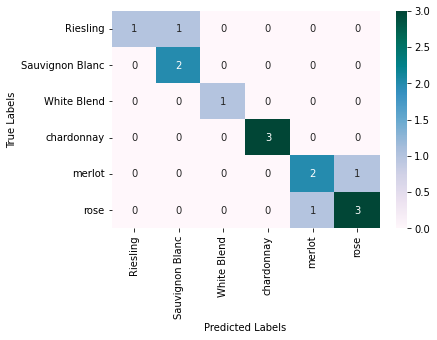

Accuracy: 80%


In [68]:
#Implementing Confusion Matrix

#This data is just for testing. We'll add in our real data later!
y_true = ["merlot", "chardonnay", "rose", "merlot", "chardonnay", "rose","merlot","chardonnay","rose","White Blend","Riesling","Riesling","Sauvignon Blanc","rose","Sauvignon Blanc"]
y_pred = ["merlot", "chardonnay", "rose", "rose", "chardonnay", "merlot","merlot","chardonnay","rose", "White Blend","Riesling","Sauvignon Blanc","Sauvignon Blanc","rose","Sauvignon Blanc"]

#Get class labels and map each class to indices 
classes = np.unique(y_true)
label_to_index = dict(zip(classes, range(classes.shape[0])))
index_to_label = dict(zip(range(classes.shape[0]), classes))

#2D array of size nxn where n = #classes
c_matrix = np.zeros((len(label_to_index), len(label_to_index)))
length = len(y_true)


#Confusion Matrix Implementation
for x in range(0, length):
    test = y_pred[x]
    true = y_true[x]
    indexOfTest = label_to_index[test]
    indexOfTrue = label_to_index[true]
    c_matrix[indexOfTrue][indexOfTest] += 1



s=seaborn.heatmap(c_matrix, annot=True, cmap='PuBuGn',xticklabels=classes,yticklabels=classes)
s.set_xlabel('Predicted Labels', fontsize=10)
s.set_ylabel('True Labels', fontsize=10)

plt.show()

#trace sums the diagonal values (the ones predicted accurately)
score = np.trace(c_matrix)/len(y_true)
print("Accuracy:", "{:.0%}".format(score))


